# Analyzing the geothermal results
I have reduced all the simulation results to a single data file of the recovery factors and CO2 emission. In this notebook, I'm going to analyze the data.

In [36]:
using Dierckx, DataFrames, PyPlot, JLD, CoolProp, CSV
include("SetPyPlot.jl")
SetPyPlot.setrcparam()
@load "input_param.jld"

16-element Array{Symbol,1}:
 :MW_CO2
 :MW_coal
 :MW_gas
 :e_igcc
 :e_ngcc
 :e_pc
 :em_coal
 :em_gas
 :eta_driver
 :eta_pump
 :ex_ccs
 :ex_coal
 :ex_gas
 :η_igcc
 :η_ngcc
 :η_pc

## Read the Dutch subsurface porosity data
This data is obtained from the following webpage:
Source: http://nlog.nl/reservoireigenschappen

In [37]:
phi_data = CSV.read("TNO_data.csv")
perm_data = dropmissing(phi_data, :Perm_arith)

,Top_tvd_m,Basis_tvd_m,Bruto_dikte_m,Netto_dikte_m,Klei_Volume_percent,Porositeitsmodel
,Float64,Float64,Float64,Float64,Float64,String
1,3299.99,3410.48,110.49,81.45,28.7,Density-Neutron
2,3455.04,3548.57,93.53,15.5,36.1,Density-Neutron
3,1443.46,1561.82,118.36,118.36,10.8,Density-Neutron
4,3463.18,3573.14,109.96,92.27,33.2,Sonic
5,3619.63,3710.12,90.49,6.9,42.2,Sonic
6,3214.26,3309.41,95.14,88.82,27.2,Density-Neutron
7,3323.45,3415.98,92.53,88.74,14.7,Density-Neutron
8,3995.18,4108.39,113.21,90.19,20.4,Density-Neutron
9,4132.59,4207.15,74.56,32.22,29.1,Density-Neutron


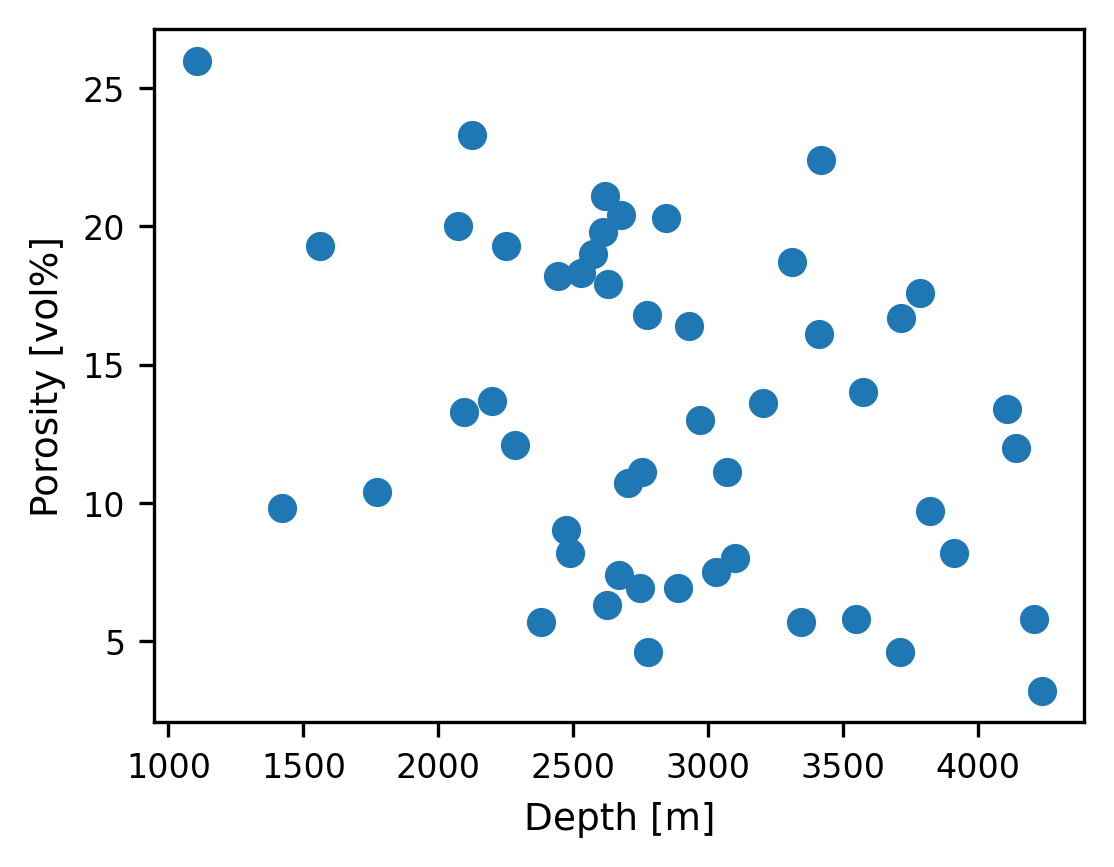

In [69]:
figure(figsize=(4,3))
plot(phi_data.Basis_tvd_m, phi_data.Porositeit, "o")
xlabel("Depth [m]")
ylabel("Porosity [vol%]")
savefig("figs/porosity_depth.png")
savefig("figs/porosity_depth.svg")

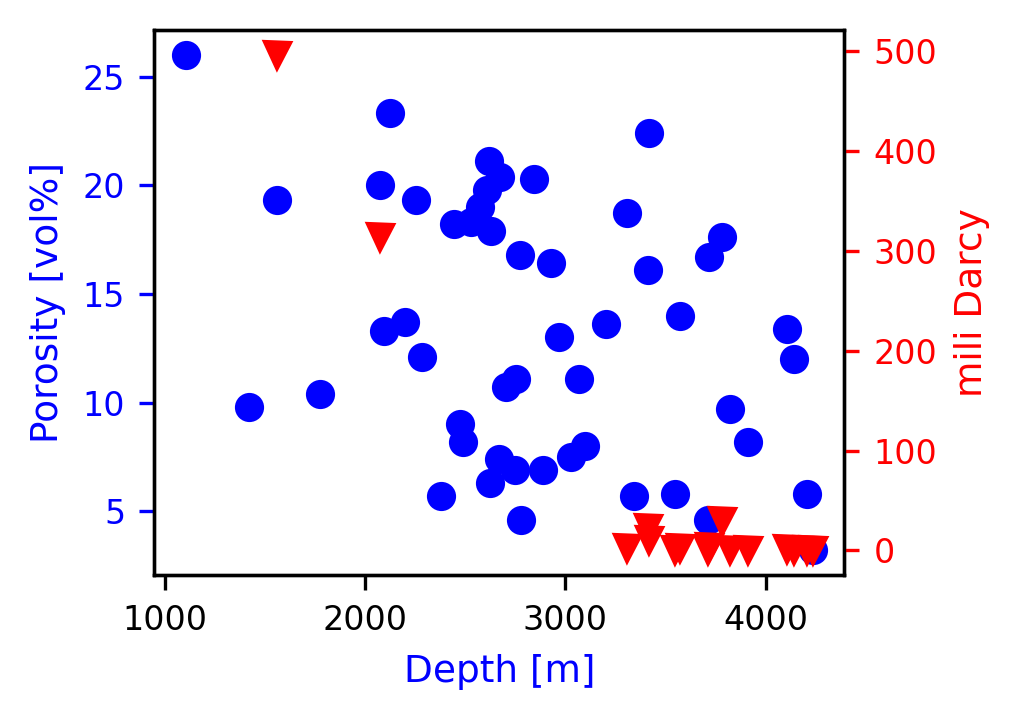

In [70]:
# plotyy(x1, y1, x2, y2; fig_size, x_label, y1_label, y2_label, y1_style, y2_style)
SetPyPlot.plotyy(phi_data.Basis_tvd_m, phi_data.Porositeit, 
    perm_data.Basis_tvd_m, perm_data.Perm_arith, y1_style = "ob", y2_style="vr", 
    x_label="Depth [m]", y1_label="Porosity [vol%]", y2_label="mili Darcy")
# plot(phi_data.Basis_tvd_m, phi_data.Perm_arith)
savefig("figs/porosity_perm_depth.png")
savefig("figs/porosity_perm_depth.svg")

In [40]:
em_gas*1e3

0.05499999999999999

In [41]:
df_geo = CSV.read("geothermal_final_results.csv")

,q_m3_s,k_m2,L_m,t_life_s,R_th,R_pr,R_ze,c_CO2
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0138889,2.0e-14,500.0,1.05763e9,-0.310919,-3.78832,-5.07761,0.286508
2,0.0138889,2.0e-14,650.0,1.4292e9,-0.417142,-4.2143,-5.62073,0.31254
3,0.0138889,2.0e-14,800.0,1.77659e9,-0.523523,-4.63601,-6.15841,0.338312
4,0.0138889,2.0e-14,900.0,2.02833e9,-0.60341,-4.95111,-6.56016,0.357568
5,0.0138889,2.0e-14,1000.0,2.2559e9,-0.676724,-5.23971,-6.92813,0.375205
6,0.0138889,5.0e-14,500.0,1.05763e9,0.388476,-1.05631,-1.59429,0.119552
7,0.0138889,5.0e-14,650.0,1.4292e9,0.352124,-1.20935,-1.78943,0.128905
8,0.0138889,5.0e-14,800.0,1.77659e9,0.313042,-1.36818,-1.99193,0.138611
9,0.0138889,5.0e-14,900.0,2.02833e9,0.282732,-1.48961,-2.14676,0.146032


# Sensitivity analysis

## Step 1
Find a list of permeability, well-spacing, and flow rates

In [42]:
flow_rates = df_geo[:q_m3_s] # [m^3/s]
k          = df_geo[:k_m2]   # [m^2]
L          = df_geo[:L_m]    # [m]
flow_range = union(flow_rates)
k_range    = union(k)
L_range    = union(L)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[42]:1
└ @ Core In[42]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[42]:2
└ @ Core In[42]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[42]:3
└ @ Core In[42]:3


5-element Array{Float64,1}:
  500.0
  650.0
  800.0
  900.0
 1000.0

In [43]:
k_range

6-element Array{Float64,1}:
 2.0e-14
 5.0e-14
 1.0e-13
 2.0e-13
 5.0e-13
 1.0e-12

## Step 2
For a fixed value of well spacing, plot the effect of perm for different flow rates, and see if the results look good:
### Effect of permeability

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[44]:9
└ @ Core ./In[44]:9
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[44]:9
└ @ Core ./In[44]:9


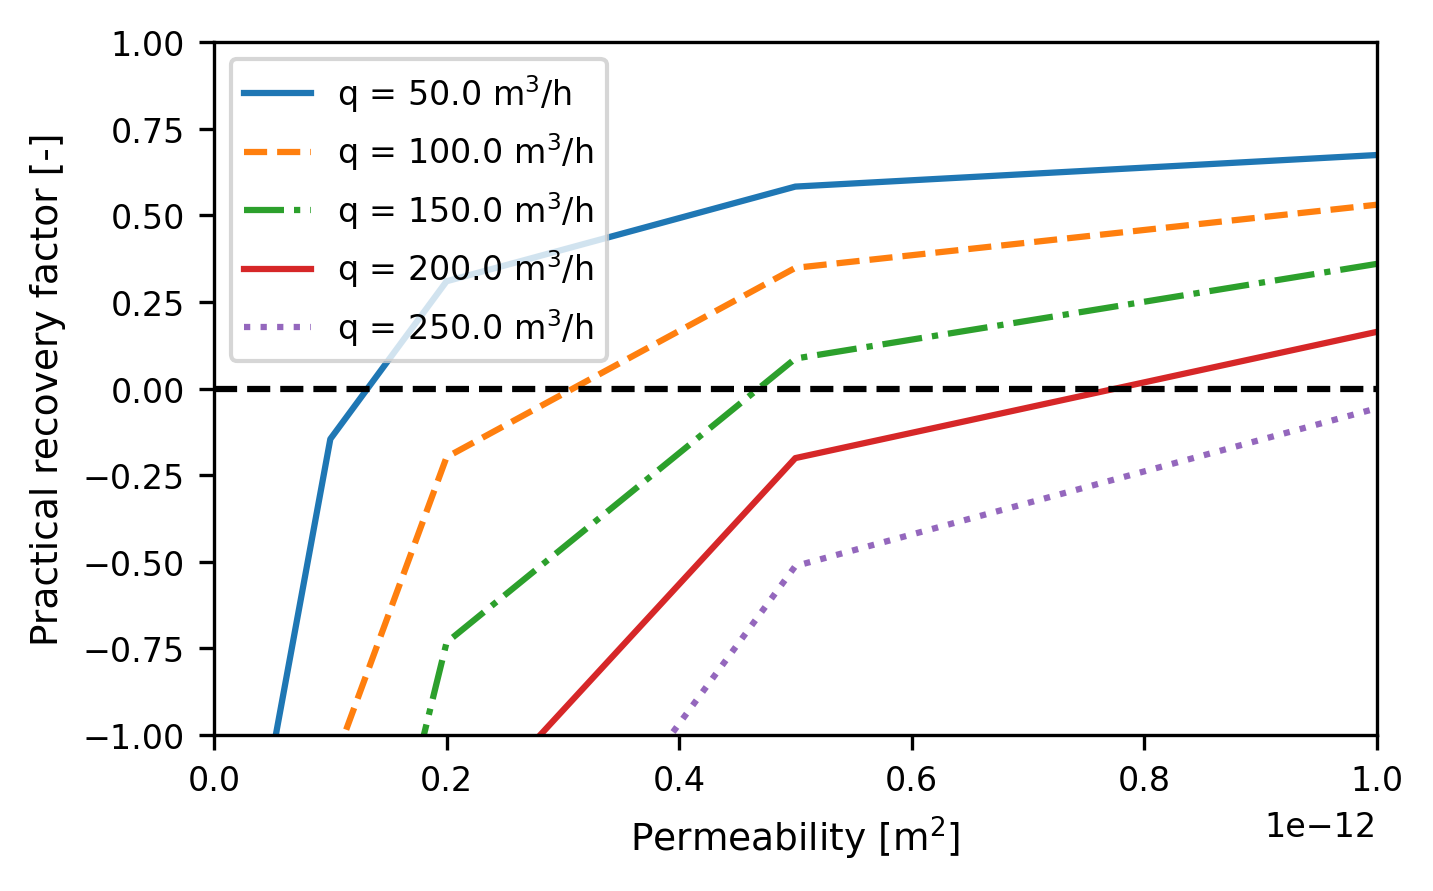

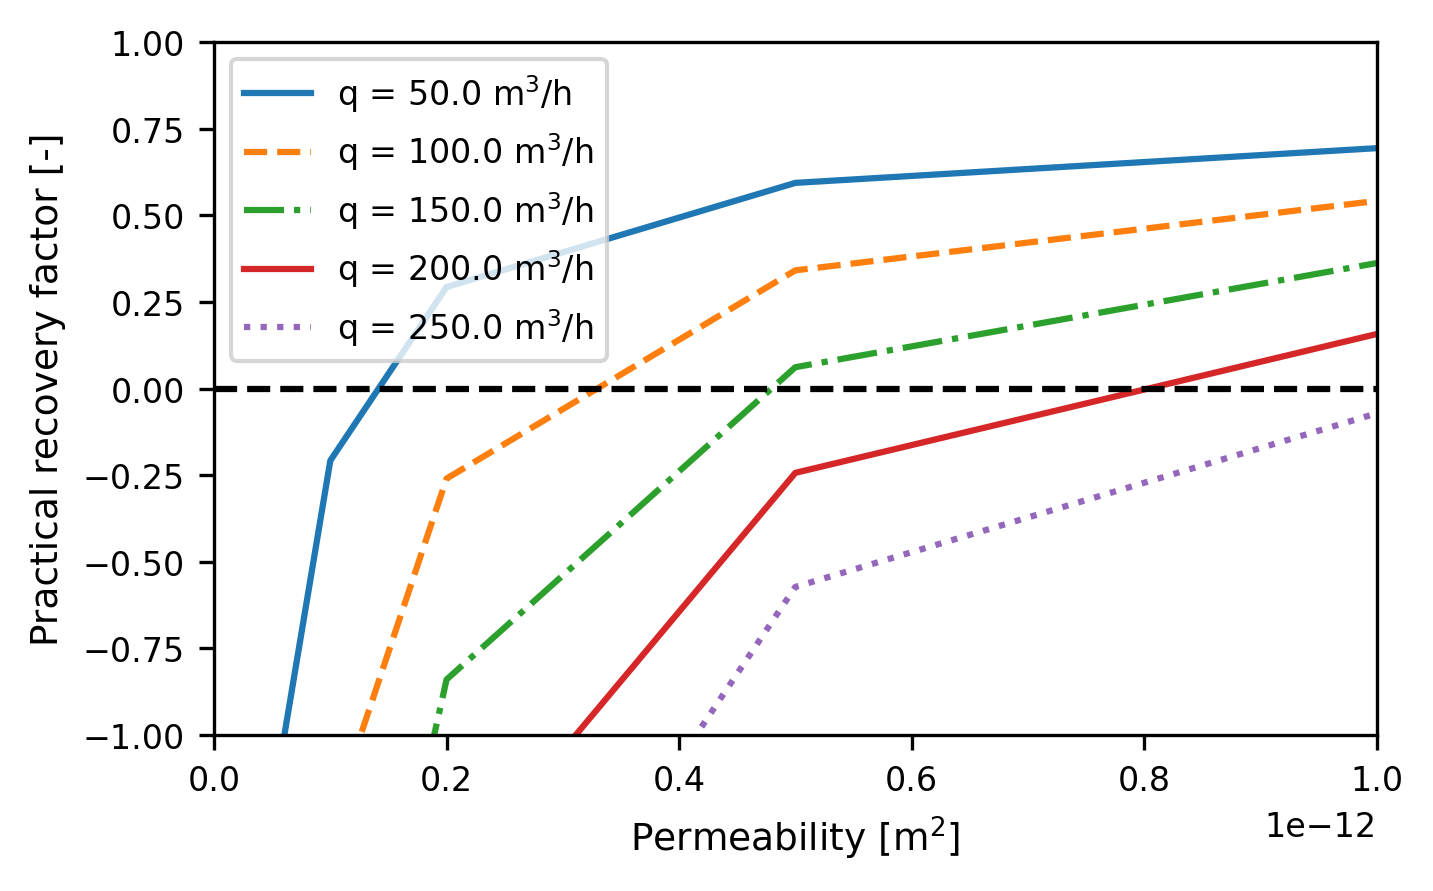

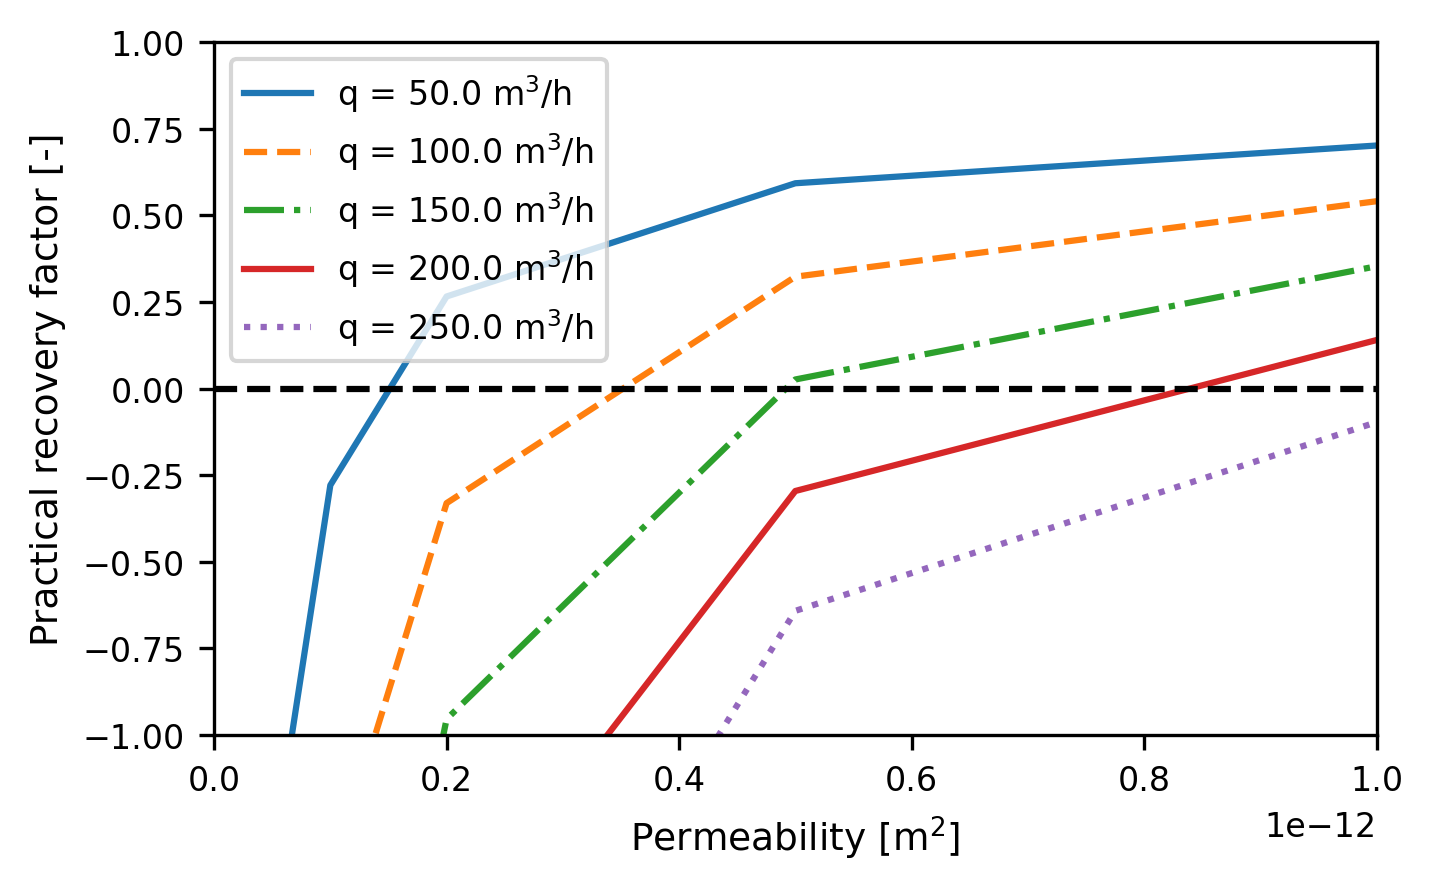

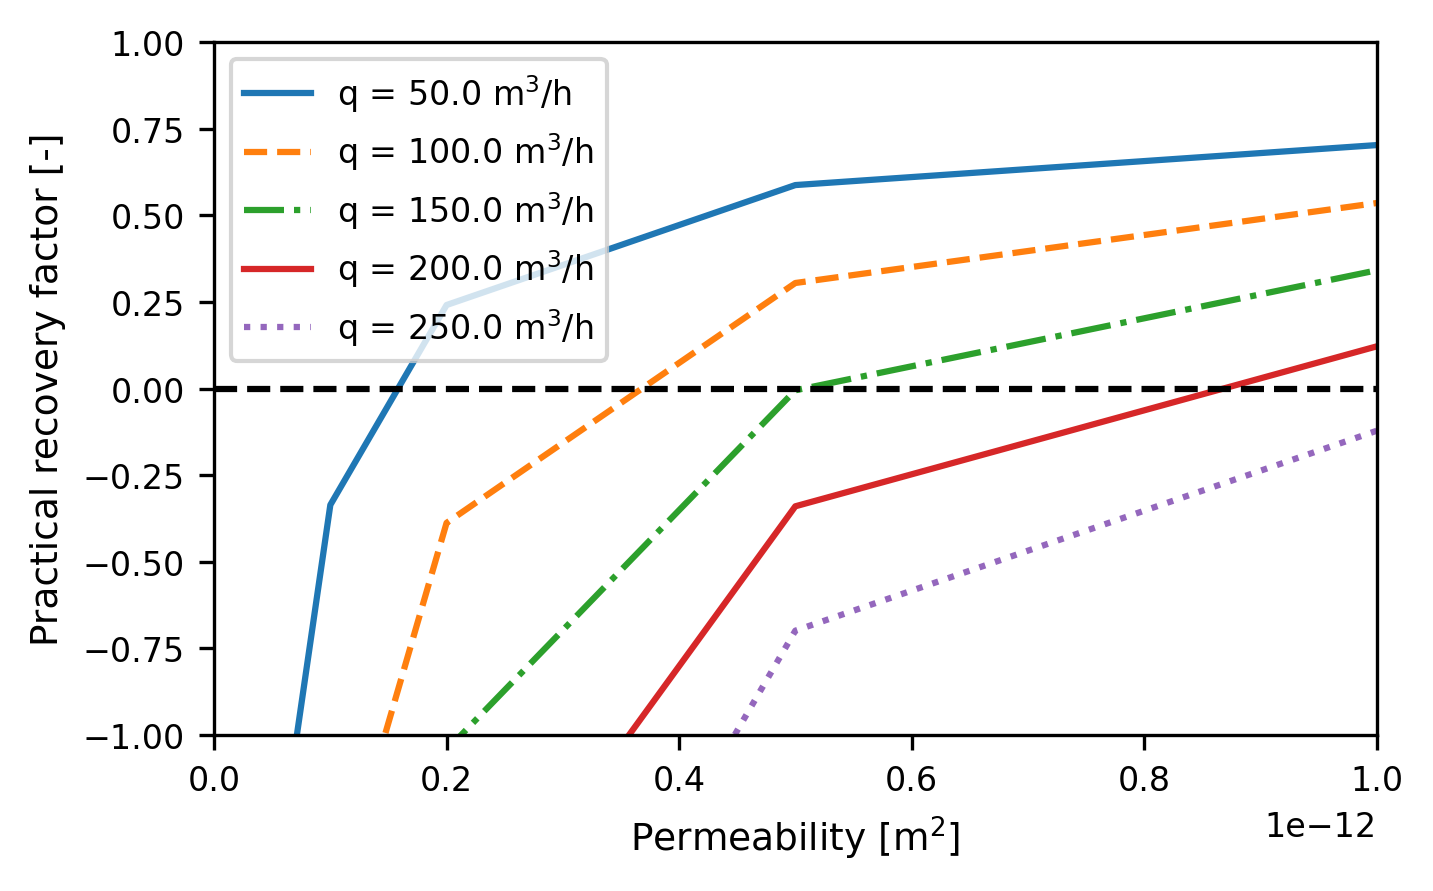

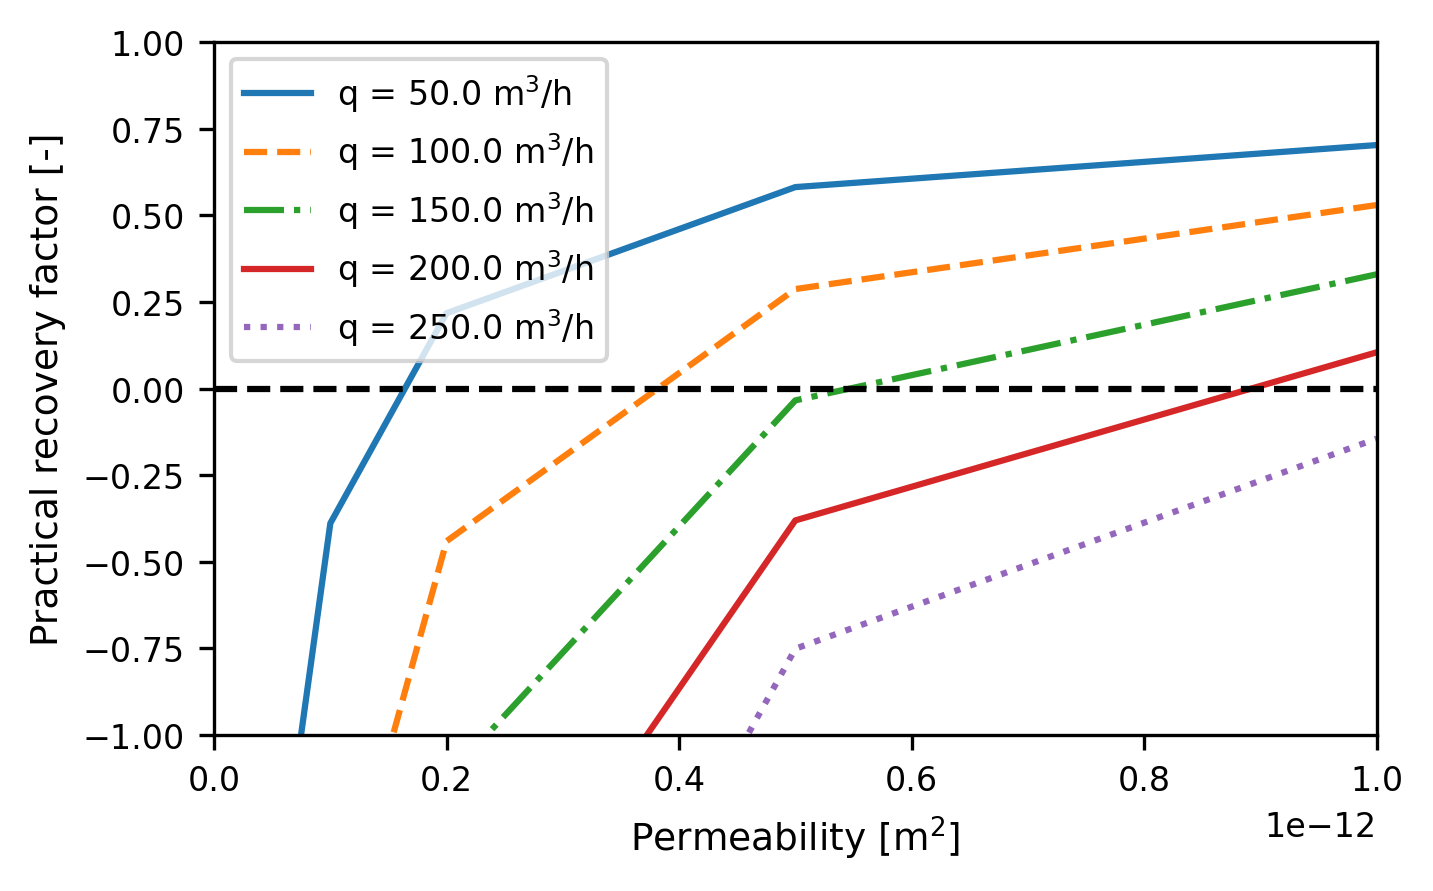

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[44]:10
└ @ Core ./In[44]:10
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[44]:10
└ @ Core ./In[44]:10


In [44]:
line_style = ["-", "--", "-.", "-", ":"]
for L_well in L_range
    figure(figsize=(5,3))
    xlabel("Permeability [m\$^2\$]")
    ylabel("Practical recovery factor [-]")
    i=0
    for q in flow_range
        i+=1
        df_temp = df_geo[(df_geo[:q_m3_s].==q) .& (df_geo[:L_m].==L_well), :]
        plot(df_temp[:k_m2], df_temp[:R_pr], line_style[i], label = "q = $(q*3600) m\$^3\$/h")
    end
    legend()
    plot([0, 1e-12], [0,0], "--k")
    axis([0, 1e-12, -1,1])
#     title("L = $L_well [m]")
    savefig("figs/practical_recovery_perm.png")
end

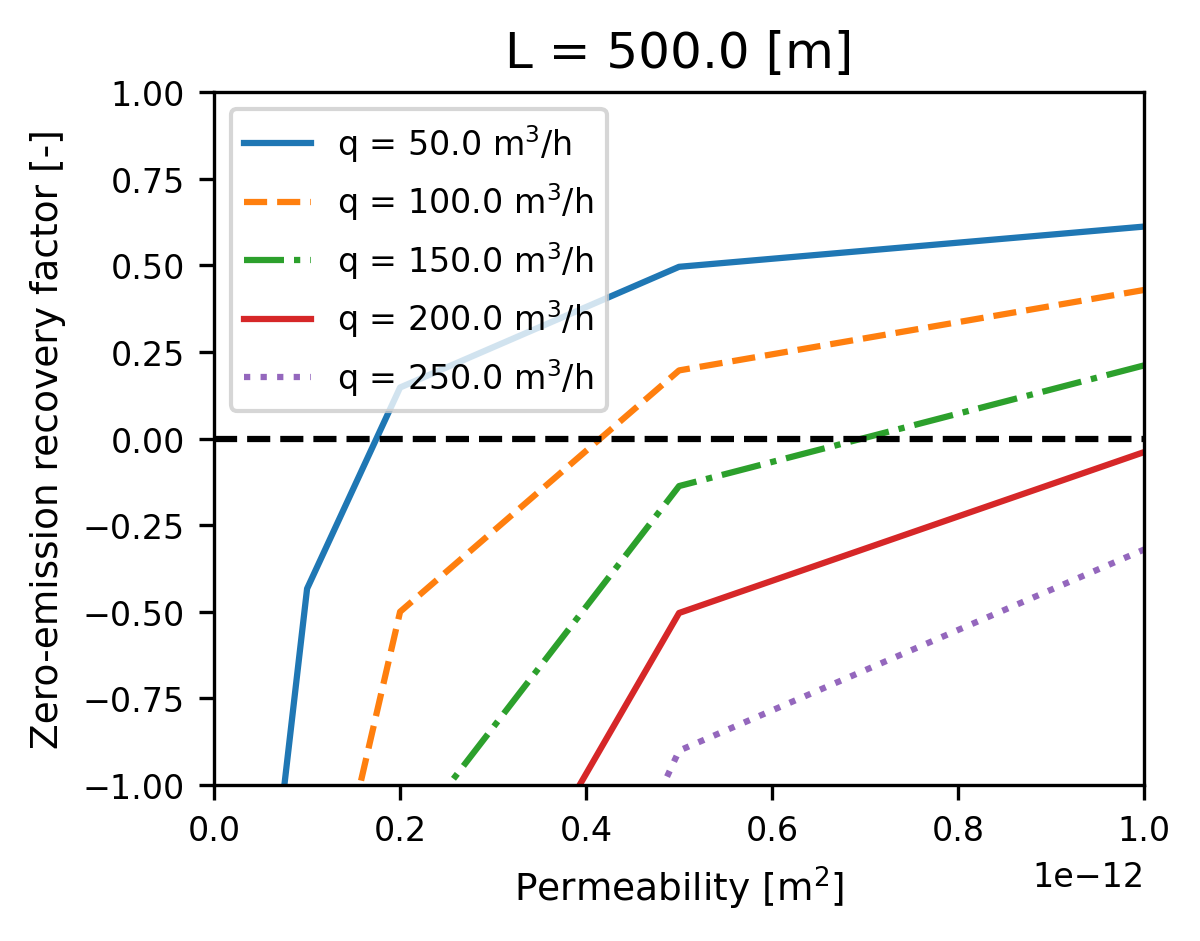

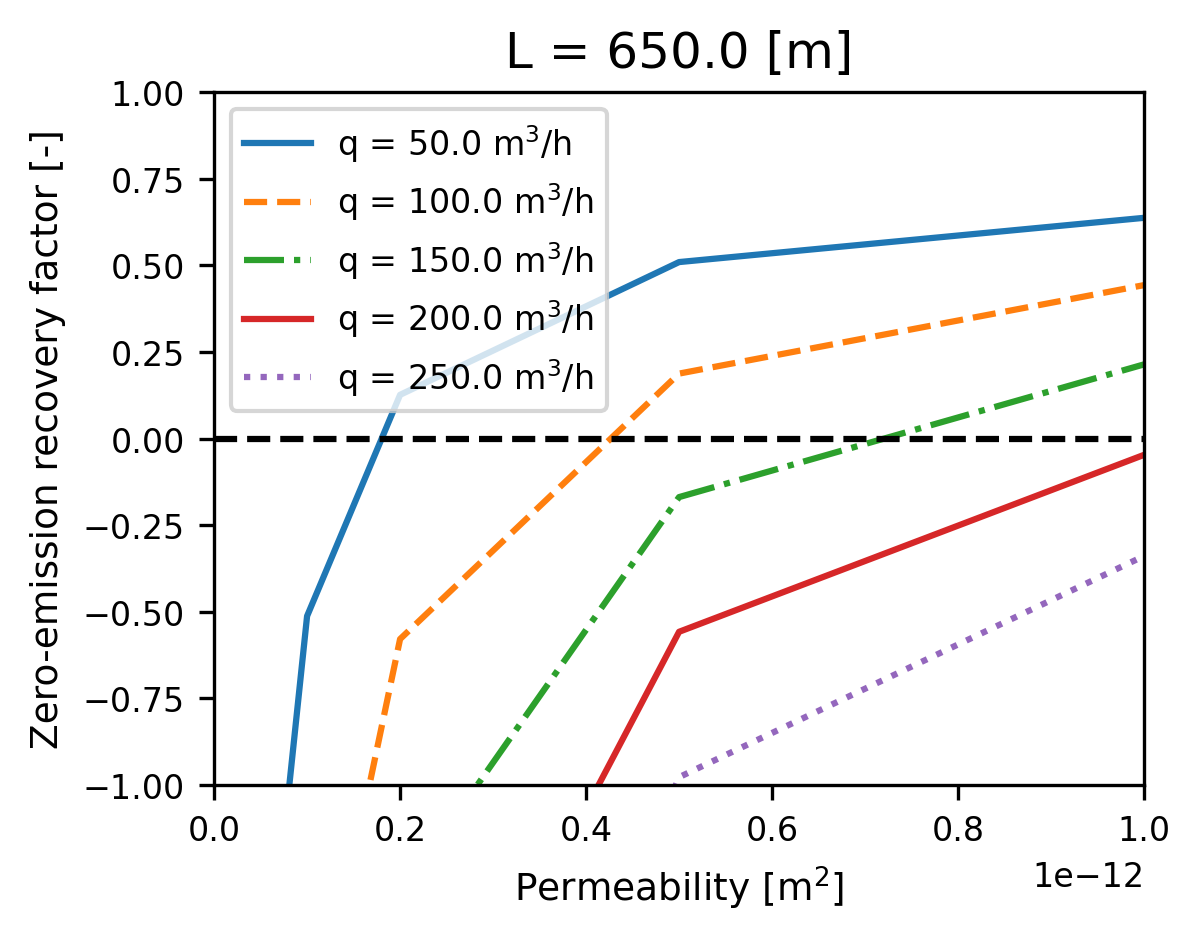

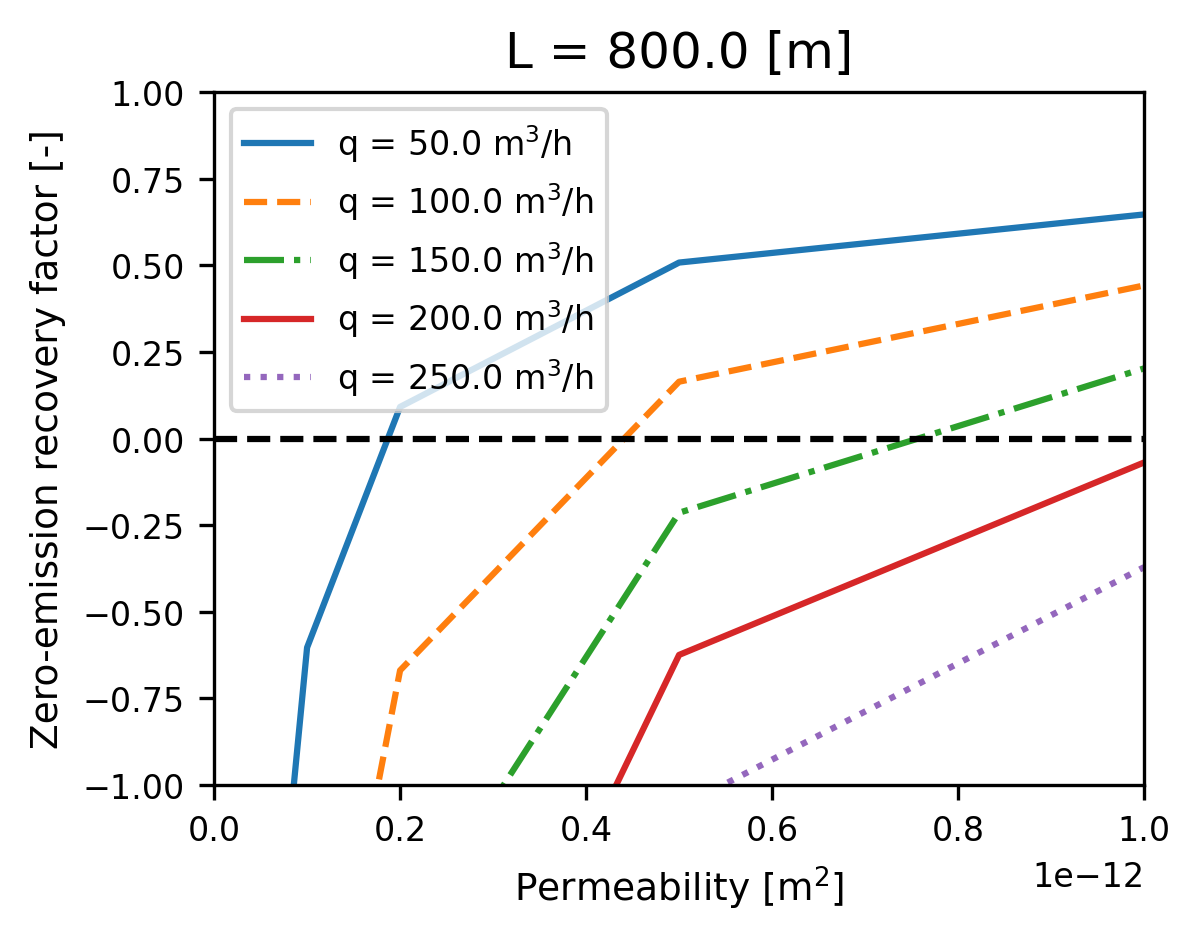

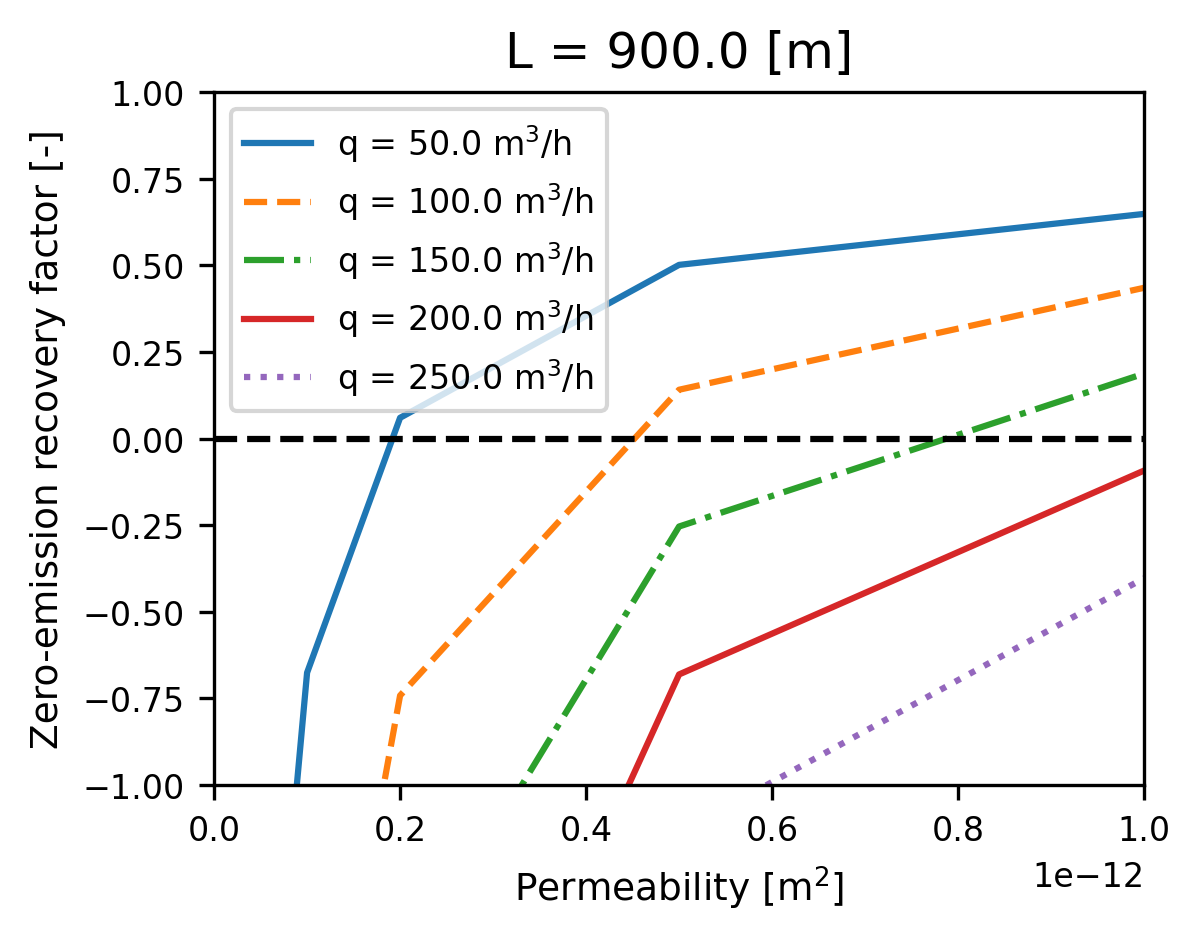

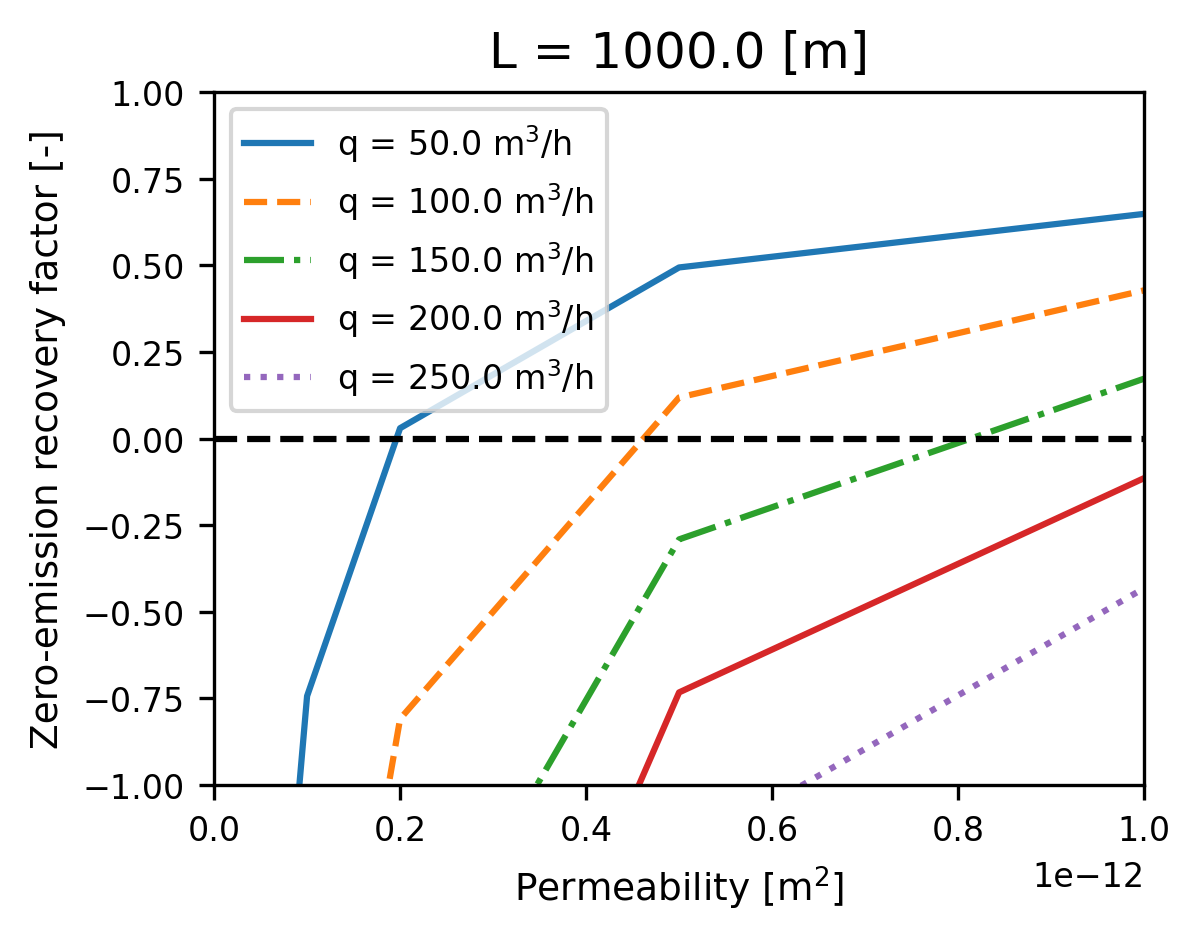

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[59]:8
└ @ Core ./In[59]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[59]:8
└ @ Core ./In[59]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[59]:9
└ @ Core ./In[59]:9
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[59]:9
└ @ Core ./In[59]:9


In [59]:
for L_well in L_range
    figure(figsize=(4,3))
    xlabel("Permeability [m\$^2\$]")
    ylabel("Zero-emission recovery factor [-]")
    i=0
    for q in flow_range
        i+=1
        df_temp = df_geo[(df_geo[:q_m3_s].==q) .& (df_geo[:L_m].==L_well), :]
        plot(df_temp[:k_m2], df_temp[:R_ze], line_style[i], label = "q = $(q*3600) m\$^3\$/h")
#         plot(df_temp[:k_m2], df_temp[:R_pr], label = "q = $(q*3600) m\$^3\$/h")
    end
    legend()
    plot([0, 1e-12], [0,0], "--k")
    axis([0, 1e-12, -1,1])
    title("L = $L_well [m]")
end

### Effect of flow rate
Change the flow rate in different well spacing in different reservoirs

In [61]:
for k_res in k_range
    figure(figsize=(5,3))
    xlabel("Flow rate \L[m^3/h]")
    ylabel("Practical recovery factor [-]")
    i=0
    for L_well in L_range
        i+=1
        df_temp = df_geo[(df_geo[:k_m2].==k_res) .& (df_geo[:L_m].==L_well), :]
        plot(df_temp[:q_m3_s]*3600, df_temp[:R_pr], line_style[i], alpha = 0.5, label = "L = $L_well [m]")
    end
    legend()
    #plot([0, 1e-12], [0,0], "--k")
    #axis([0, 1e-12, -1,1])
    title("k = $(k_res*1e12) [D]")
end

LoadError: syntax: invalid escape sequence

### Effect of flow rate on the project life time
Conclusion: project life time does not depend on the permeability of the reservoir. It is important for the project to have an acceptable lifetime to justify the capital investments.

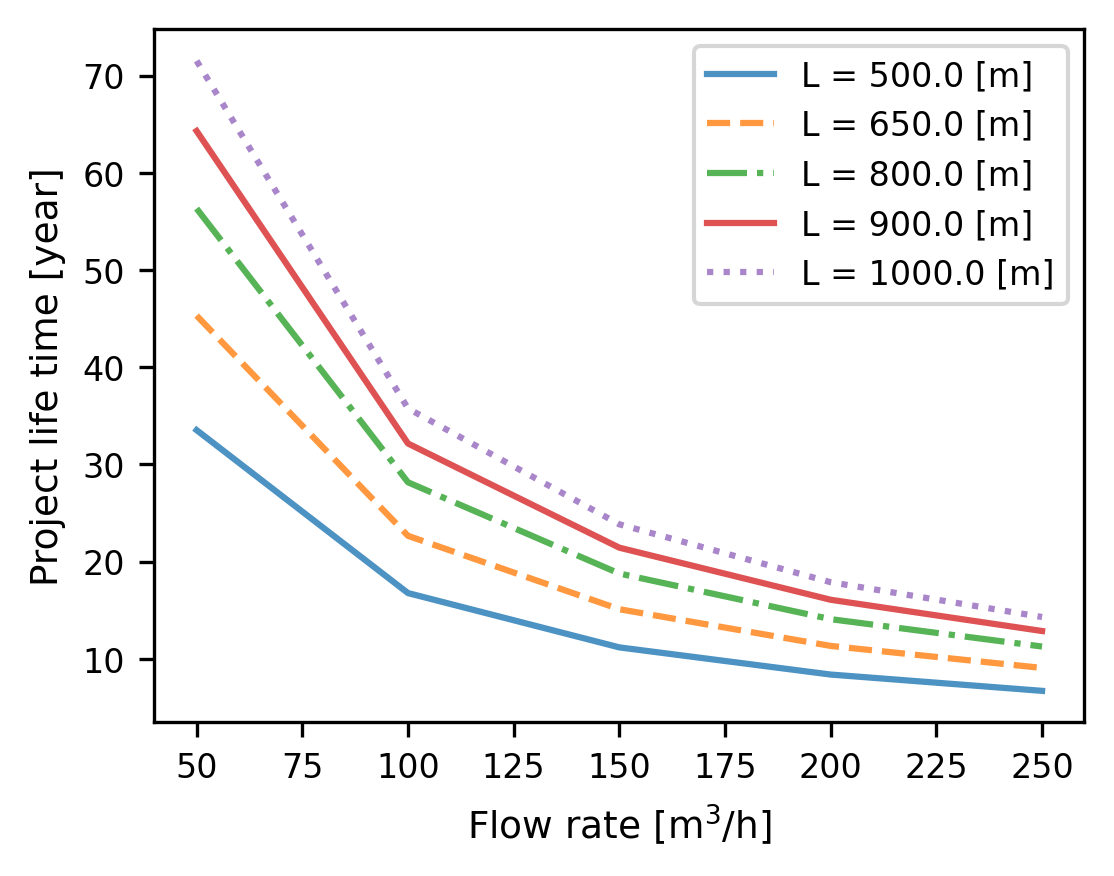

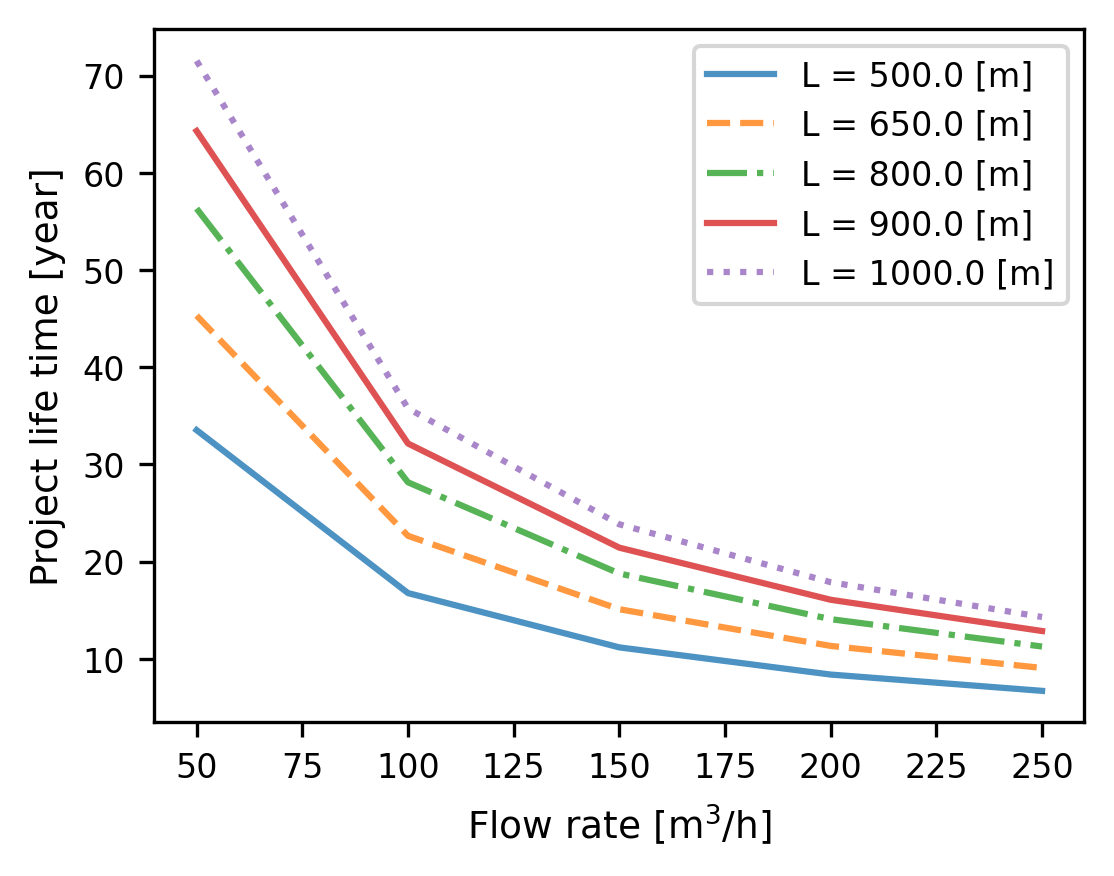

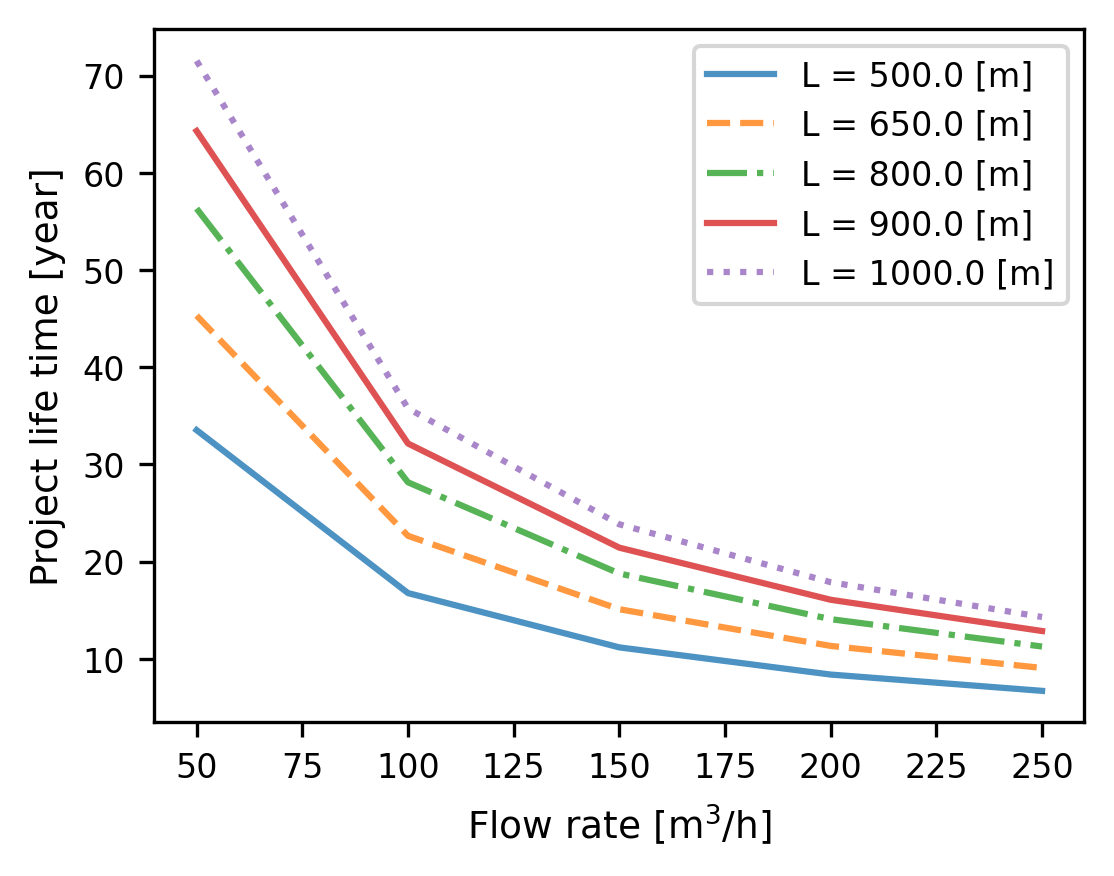

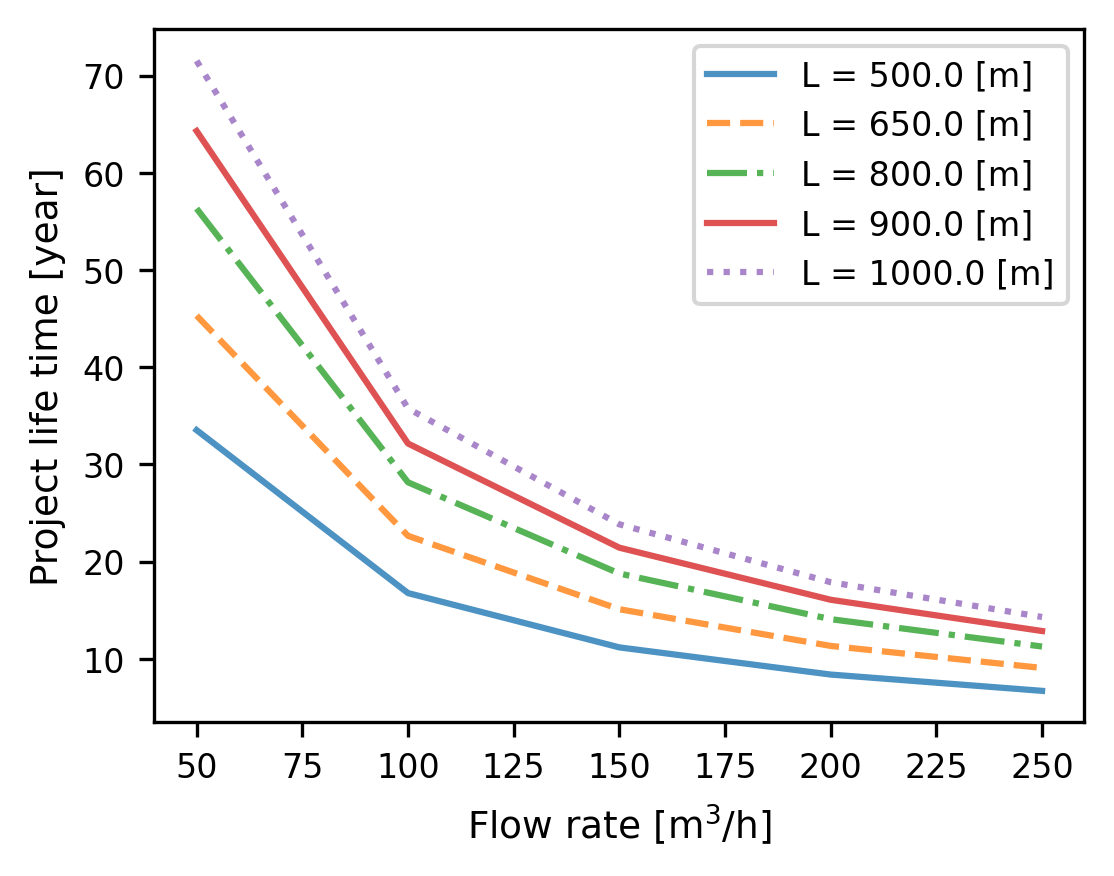

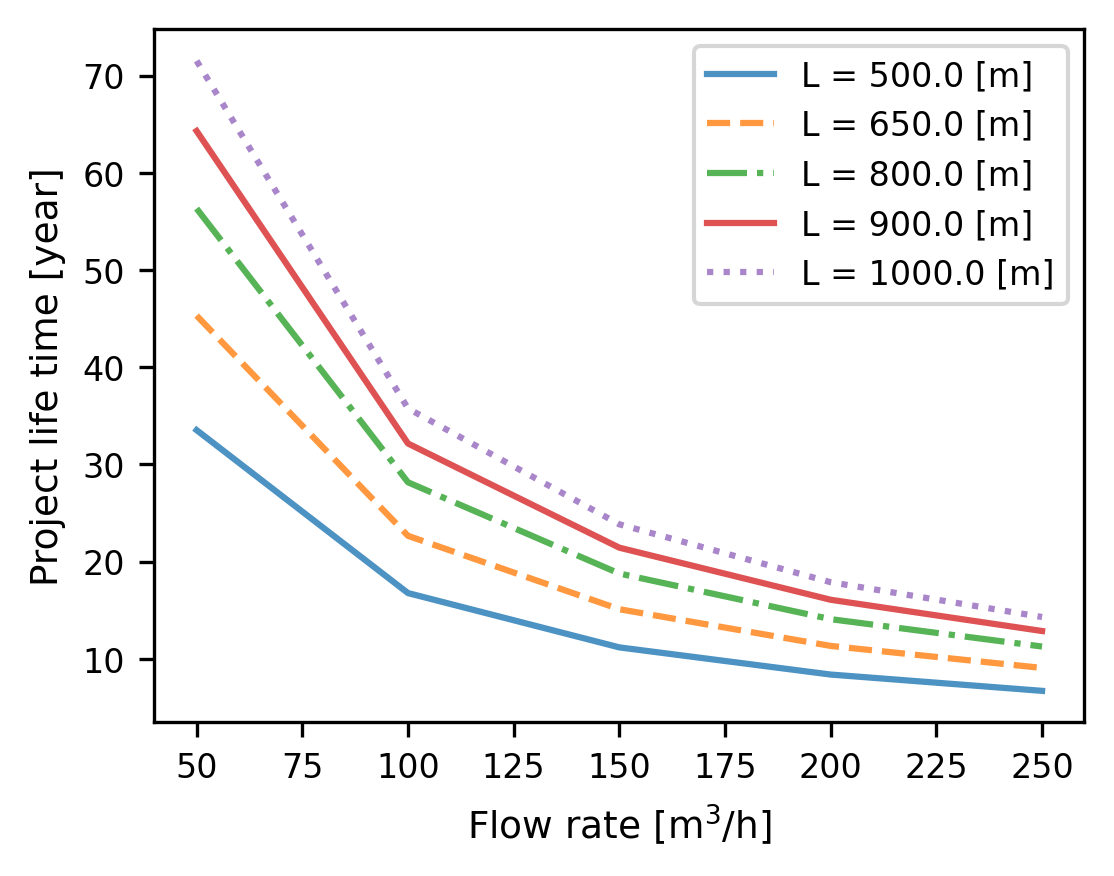

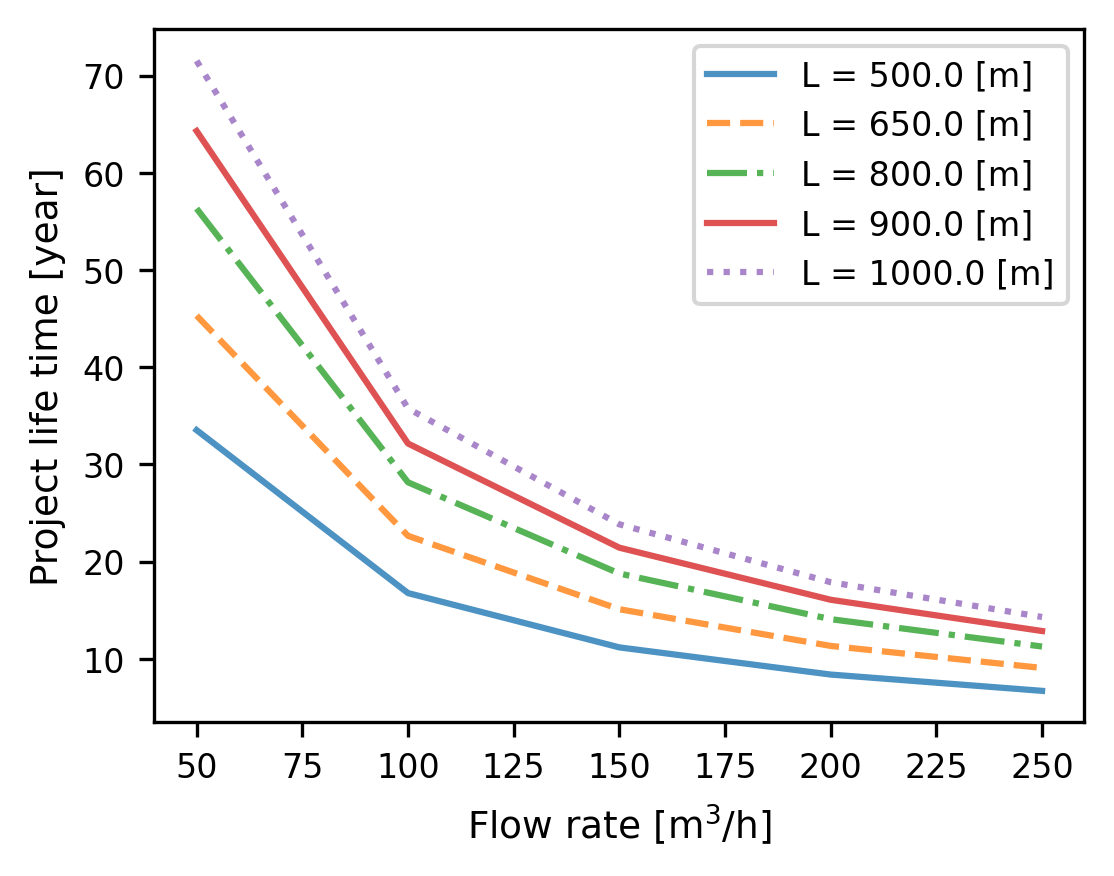

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[62]:8
└ @ Core ./In[62]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[62]:8
└ @ Core ./In[62]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[62]:9
└ @ Core ./In[62]:9
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[62]:9
└ @ Core ./In[62]:9


In [62]:
for k_res in k_range
    figure(figsize=(4,3))
    xlabel("Flow rate [m\$^3\$/h]")
    ylabel("Project life time [year]")
    i=0
    for L_well in L_range
        i+=1
        df_temp = df_geo[(df_geo[:k_m2].==k_res) .& (df_geo[:L_m].==L_well), :]
        plot(df_temp[:q_m3_s]*3600, df_temp[:t_life_s]/(3600*24*365), line_style[i], alpha = 0.8, label = "L = $L_well [m]")
    end
    legend()
    #plot([0, 1e-12], [0,0], "--k")
    #axis([0, 1e-12, -1,1])
#     plot(df_geo[:q_m3_s]*3600, df_geo[:t_life_s]/(3600*24*365), "o")
    savefig("figs/project_life_time.png")
#     title("k = $(k_res*1e12) [D]")
end

### CO2 emission:

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[48]:2
└ @ Core In[48]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[48]:2
└ @ Core In[48]:2


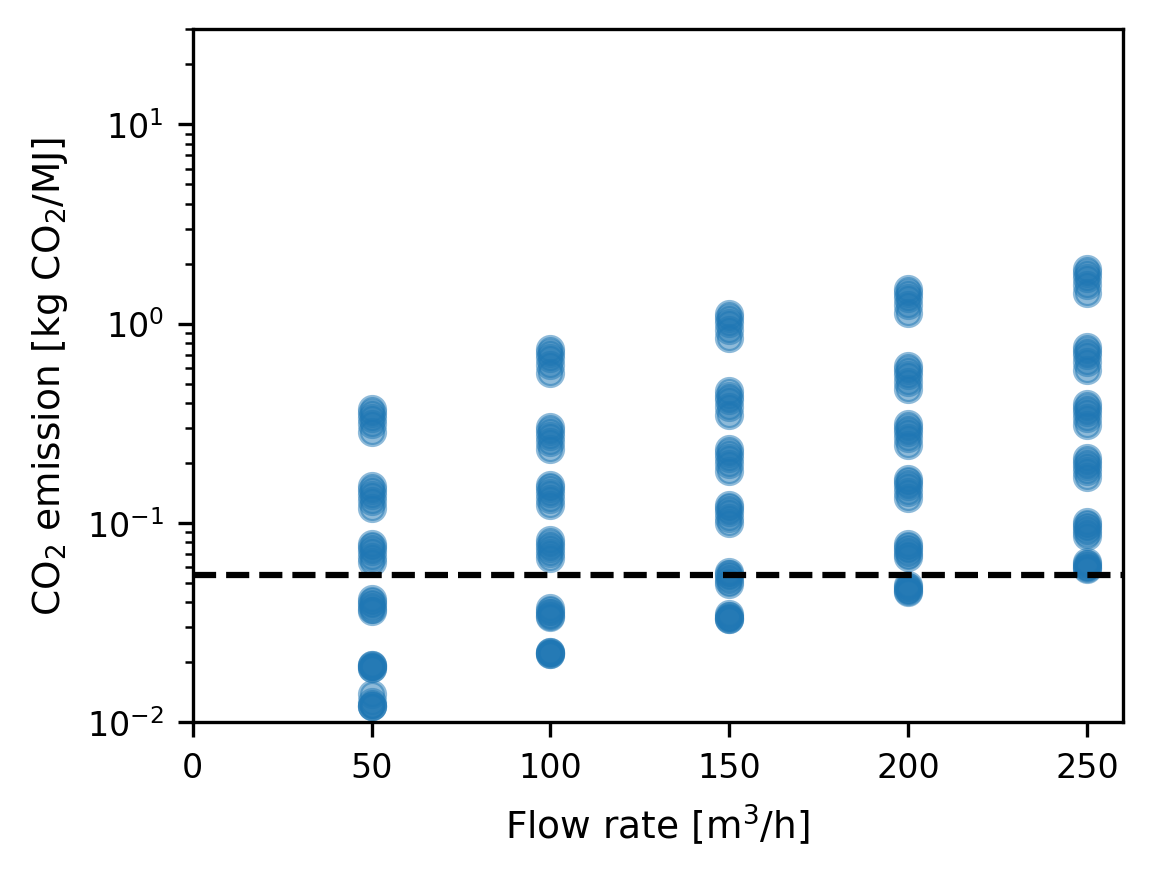

In [48]:
figure(figsize=(4,3))
semilogy(df_geo[:q_m3_s]*3600, df_geo[:c_CO2], alpha = 0.5, "o")
semilogy([0, 260], [em_gas, em_gas]*1e3, "--k")
xlabel("Flow rate [m\$^3\$/h]")
ylabel("CO\$_2\$ emission [kg CO\$_2\$/MJ]")
axis([0, 260, 1e-2, 30])
savefig("figs/CO2_emission_flow.png")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[65]:2
└ @ Core In[65]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[65]:2
└ @ Core In[65]:2


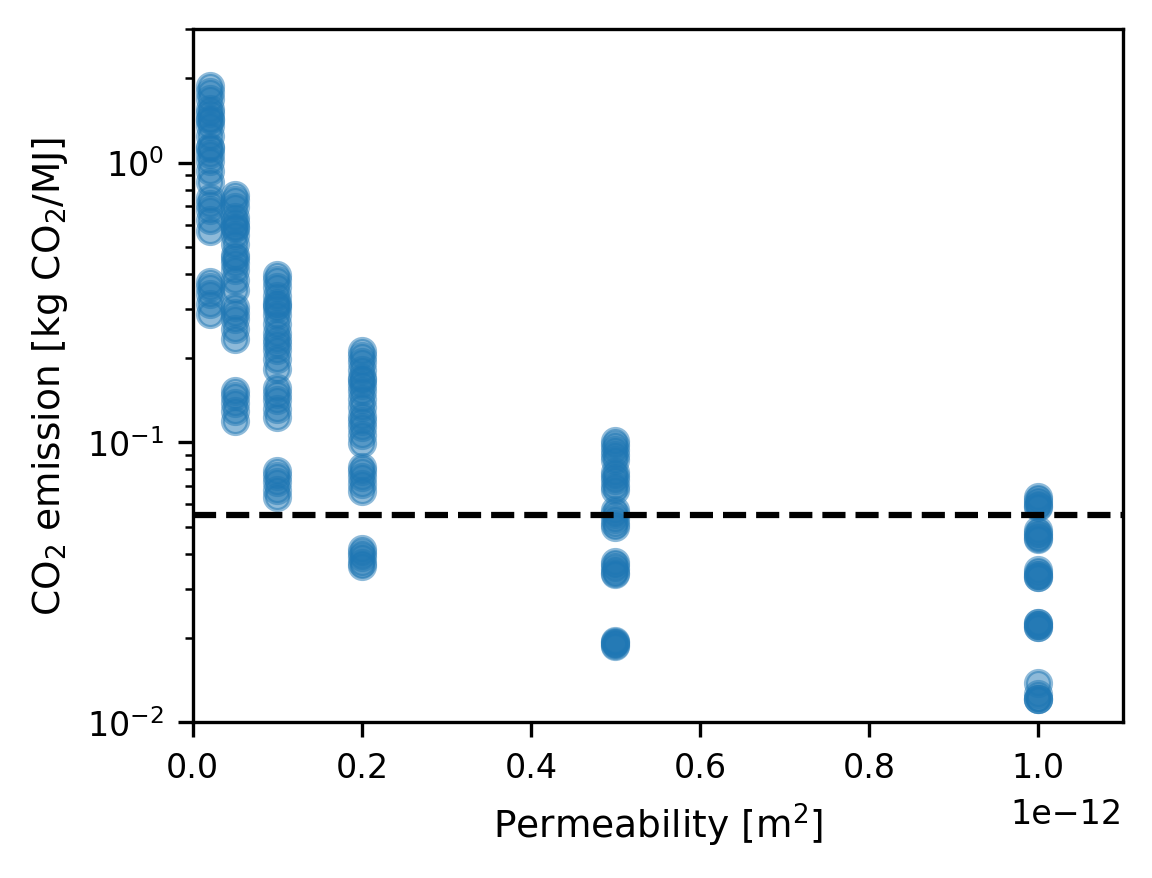

In [65]:
figure(figsize=(4,3))
semilogy(df_geo[:k_m2], df_geo[:c_CO2], alpha = 0.5, "o")
semilogy([0, 1.1e-12], [em_gas, em_gas]*1e3, "--k")
xlabel("Permeability [m\$^2\$]")
ylabel("CO\$_2\$ emission [kg CO\$_2\$/MJ]")
axis([0, 1.1e-12, 1e-2, 3])
savefig("figs/CO2_emission_perm.png")

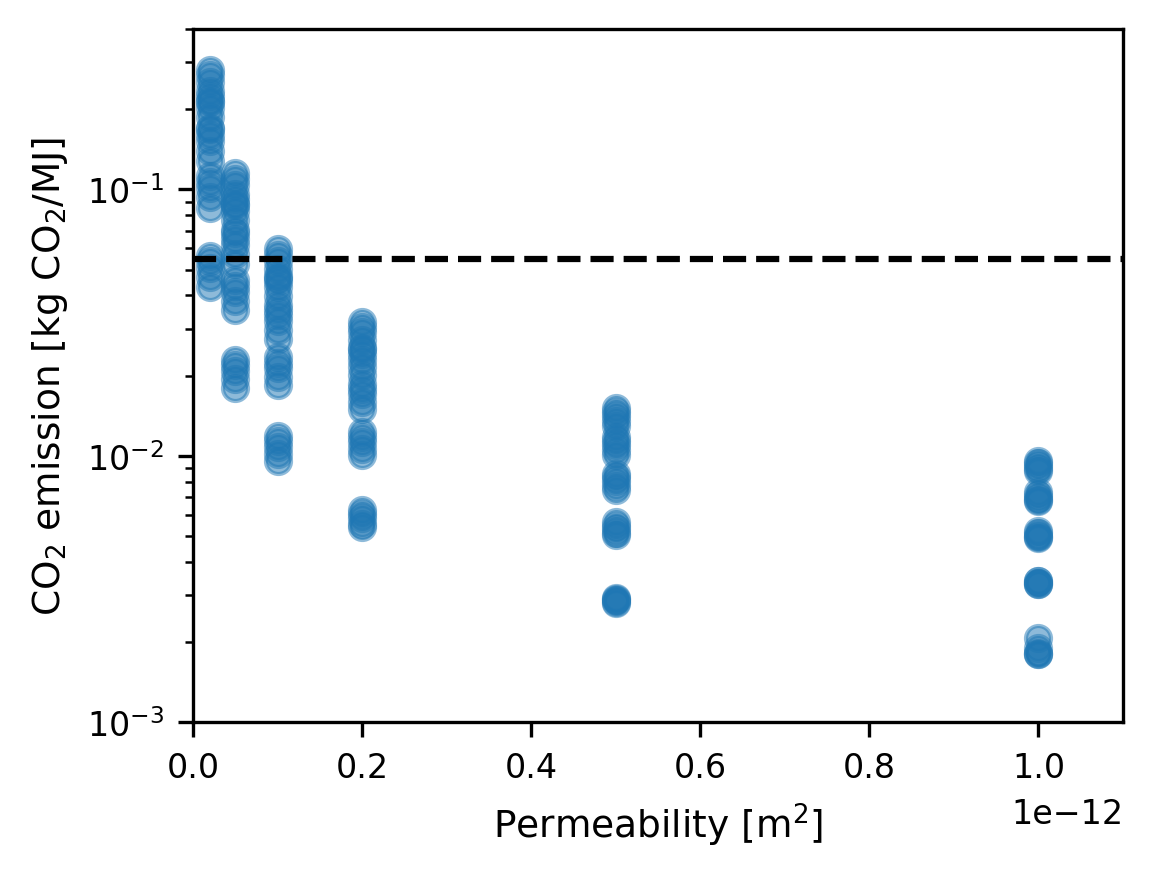

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[68]:2
└ @ Core In[68]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[68]:2
└ @ Core In[68]:2


In [68]:
figure(figsize=(4,3))
semilogy(df_geo[:k_m2], df_geo[:c_CO2]*0.15, alpha = 0.5, "o")
semilogy([0, 1.1e-12], [em_gas, em_gas]*1e3, "--k")
xlabel("Permeability [m\$^2\$]")
ylabel("CO\$_2\$ emission [kg CO\$_2\$/MJ]")
axis([0, 1.1e-12, 1e-3, 4e-1])
savefig("figs/CO2_emission_perm.png")

## Find the optimum range
Apply the following criteria:
  + life time longer than 30 years
  + positive zero-emission recovery factors
  + lower that two times methane emission

In [52]:
T_c = 2.0+273.15 # [K]
T_h = 22+273.15 # [K]
COP_th = T_h/(T_h-T_c)
COP_air = 2.0 # average value (per unit electricity)
COP_geo = 5.0 # shallow heat (comes from the sun)
COP_methane = 1.0 # ignoring heat loss

t_life_crit = 30       # years
c_CO2_crit  = em_gas*1e3*2.0 # kg/MJ

u_ht = 1.0 # W/m2/K
A_ht = 4*10.0*3.0 # only surrounding walls
Q_heat = u_ht*A_ht*(T_h-T_c)/1000 # kJ/s
n_houses = 400 # number of houses to be covered by the geothermal project
m_water = Q_heat*1000*n_houses/(PropsSI("HMASS", "T", 80+273.15, "P", 1e5, "H2O")-PropsSI("HMASS", "T", 40+273.15, "P", 1e5, "H2O"))
q_water = m_water/PropsSI("D", "T", 40+273.15, "P", 1e5, "H2O") # [m3/s]

df_practical = df_geo[(df_geo[:t_life_s].>(30.0*24*3600)) & (df_geo[:R_ze].>0.0) & (df_geo[:c_CO2].<c_CO2_crit), :]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[52]:17
└ @ Core In[52]:17
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[52]:17
└ @ Core In[52]:17


MethodError: MethodError: no method matching &(::BitArray{1}, ::BitArray{1})
Closest candidates are:
  &(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  &(!Matched::PyCall.PyObject, ::Any) at /home/ali/.julia/packages/PyCall/zqDXB/src/pyoperators.jl:13
  &(::Any, !Matched::PyCall.PyObject) at /home/ali/.julia/packages/PyCall/zqDXB/src/pyoperators.jl:14

In [53]:
flow_rates_pr = df_practical[:q_m3_s] # [m^3/s]
k_pr          = df_practical[:k_m2]   # [m^2]
L_pr          = df_practical[:L_m]    # [m]
flow_range_pr = union(flow_rates_pr)
k_range_pr    = union(k_pr)
L_range_pr    = union(L_pr)

UndefVarError: UndefVarError: df_practical not defined

In [54]:
k_range_pr

UndefVarError: UndefVarError: k_range_pr not defined

In [55]:
figure(figsize=(5,3))
plot(df_practical[:q_m3_s]*3600, df_practical[:c_CO2], alpha = 0.5, "o")
plot([0, 260], [em_gas, em_gas]*1e3, "--k")
xlabel("Flow rate [m^3/h]")
ylabel("CO2 emission [kg CO2/MJ]")
tight_layout()
savefig("carbon_emission_geothermal.png")

UndefVarError: UndefVarError: df_practical not defined

## Compare with the current state of technology
The theoretical COP can be calculated based on the temperature of the outside (temperature outside of the house, where heat is extracted) and the desirable temperature inside (where heat is delivered). It is calculated by 
$$COP_{th} = \frac{T_h}{T_h-T_c}$$

## compare with a methane burner
Find cases with a COP less than 1.0

In [56]:
df_current = df_geo[df_geo[:COP].<1.0, :]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:1
└ @ Core In[56]:1


,q_m3_s,k_m2,L_m,t_life_s,R_th,R_pr,R_ze,c_CO2
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0277778,2.0e-14,500.0,5.28817e8,-1.4896,-8.39255,-10.948,0.567878
2,0.0277778,2.0e-14,650.0,7.14598e8,-1.71221,-9.27316,-12.0708,0.621693
3,0.0277778,2.0e-14,800.0,8.88297e8,-1.9307,-10.1328,-13.1668,0.674227
4,0.0277778,2.0e-14,900.0,1.01416e9,-2.09324,-10.7707,-13.9802,0.713212
5,0.0277778,2.0e-14,1000.0,1.12795e9,-2.24194,-11.3538,-14.7236,0.748846
6,0.0416667,2.0e-14,500.0,3.52545e8,-2.67527,-13.0241,-16.8532,0.850915
7,0.0416667,2.0e-14,650.0,4.76399e8,-3.01422,-14.3591,-18.5554,0.932503
8,0.0416667,2.0e-14,800.0,5.92198e8,-3.34479,-15.6566,-20.2096,1.01179
9,0.0416667,2.0e-14,900.0,6.7611e8,-3.58998,-16.6174,-21.4347,1.07051


:MW_CO2    
 :MW_coal   
 :MW_gas    
 :e_igcc    
 :e_ngcc    
 :e_pc      
 :em_coal   
 :em_gas    
 :eta_driver
 :eta_pump  
 :ex_ccs    
 :ex_coal   
 :ex_gas    
 :η_igcc    
 :η_ngcc    
 :η_pc      

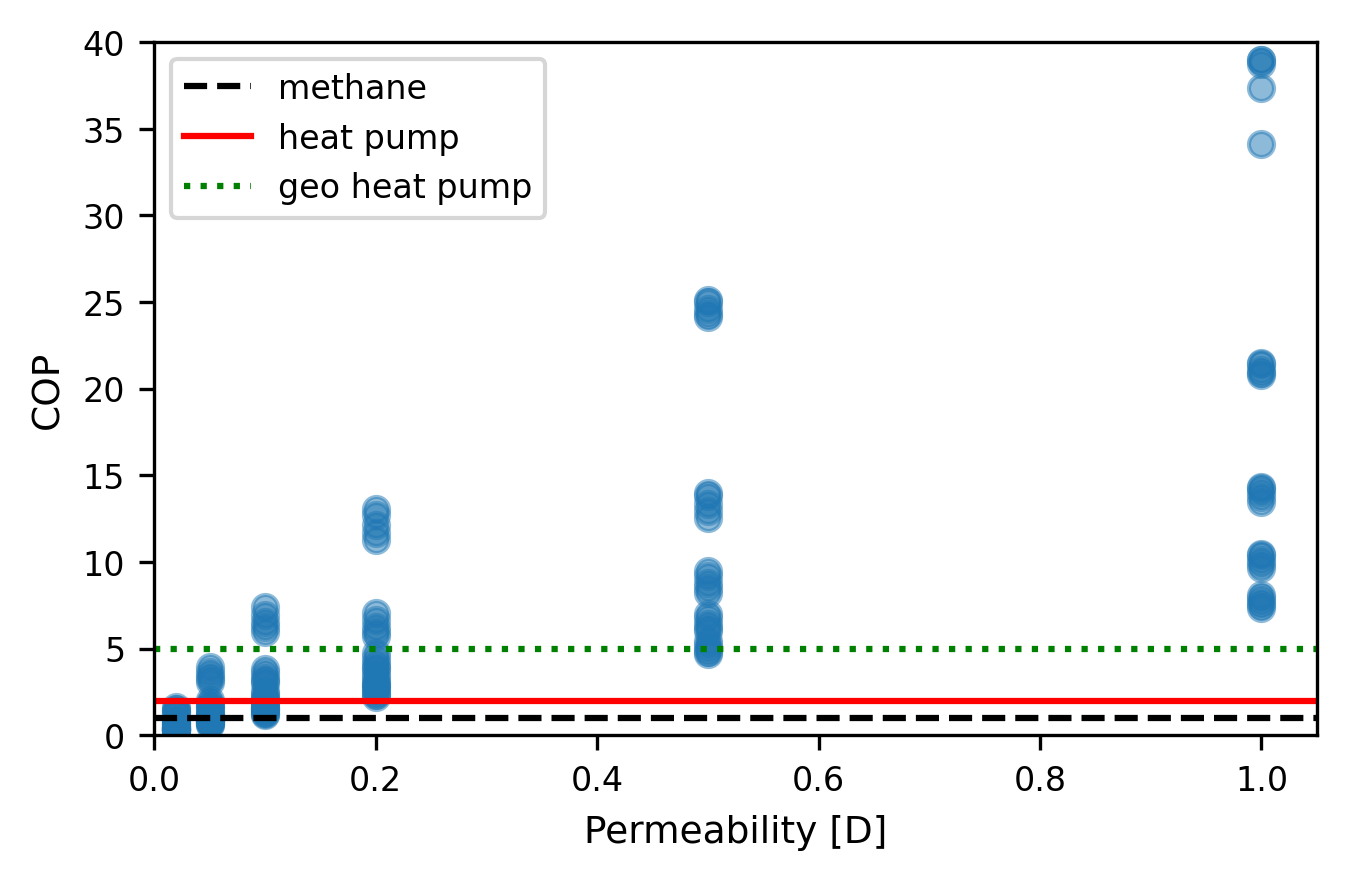

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[57]:2
└ @ Core In[57]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[57]:2
└ @ Core In[57]:2


PyObject Text(0.5, 66.0, 'Permeability [D]')

In [57]:
figure(figsize=(5,3))
plot(df_geo[:k_m2]*1e12, df_geo[:COP], "o", alpha = 0.5)
plot([0,1.1], [1.0, 1.0], "--k", label = "methane")
plot([0,1.1], [2.0, 2.0], "-r", label = "heat pump")
plot([0,1.1], [5.0, 5.0], ":g", label = "geo heat pump")
axis([0,1.05,0,40])
legend()
ylabel("COP")
xlabel("Permeability [D]")

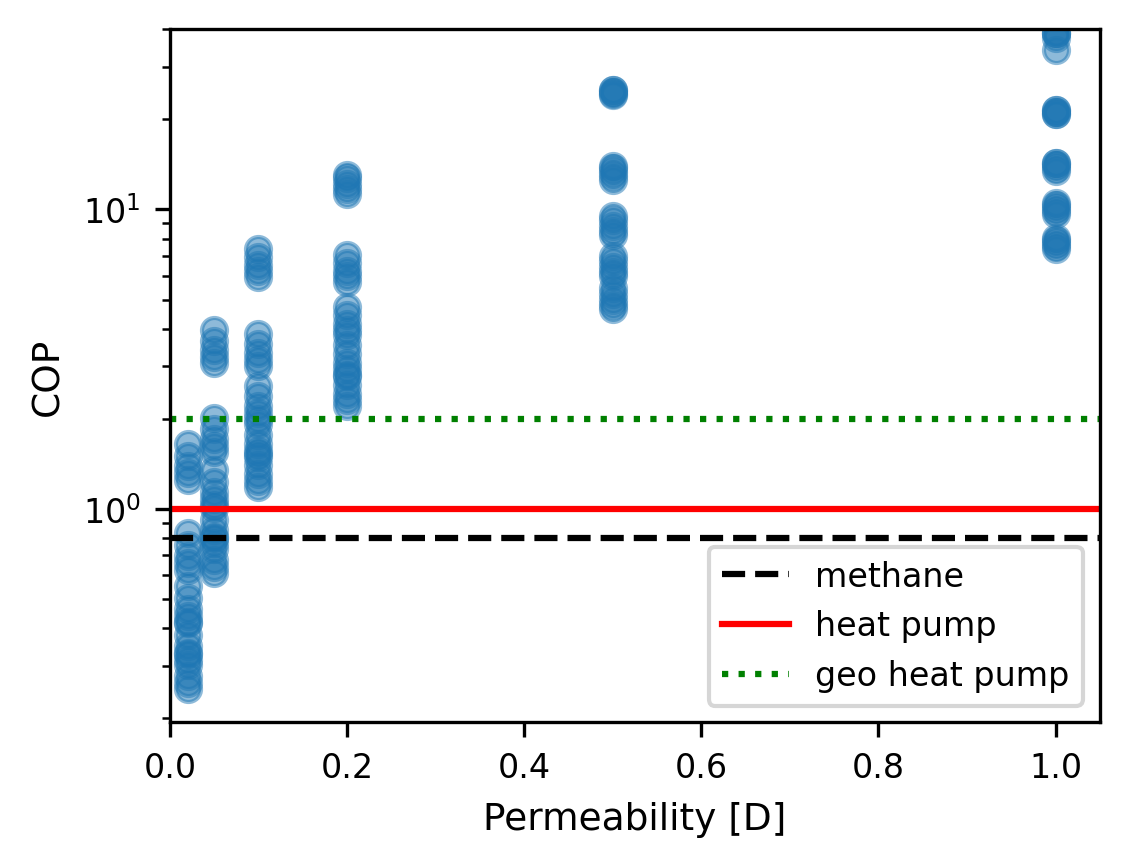

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[58]:2
└ @ Core In[58]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[58]:2
└ @ Core In[58]:2


In [58]:
figure(figsize=(4,3))
semilogy(df_geo[:k_m2]*1e12, df_geo[:COP], "o", alpha = 0.5)
semilogy([0,1.1], [0.8, 0.8], "--k", label = "methane")
semilogy([0,1.1], [1.0, 1.0], "-r", label = "heat pump")
semilogy([0,1.1], [2.0, 2.0], ":g", label = "geo heat pump")
axis([0,1.05,0,40])
legend()
ylabel("COP")
xlabel("Permeability [D]")
savefig("figs/COP_alternatives.png")